In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Importing Data

In [2]:
data = pd.read_csv("cars_dataset (1).csv")
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,7 Series,2017,52950,Automatic,22000,Petrol,150.0,22.1,6.6,BMW
1,7 Series,2017,57000,Automatic,11297,Petrol,145.0,22.1,6.6,BMW
2,A8,2015,32000,Automatic,30306,Petrol,570.0,25.0,6.3,audi
3,R8,2019,129000,Semi-Auto,4000,Petrol,145.0,21.4,5.2,audi
4,R8,2020,137995,Semi-Auto,70,Petrol,145.0,21.1,5.2,audi
...,...,...,...,...,...,...,...,...,...,...
72202,i3,2017,19300,Automatic,32867,Other,0.0,470.8,0.6,BMW
72203,i3,2017,20000,Automatic,19178,Other,0.0,470.8,0.6,BMW
72204,i3,2017,19500,Automatic,23956,Other,135.0,470.8,0.6,BMW
72205,i3,2016,17000,Automatic,41063,Other,0.0,470.8,0.6,BMW


In [3]:
data.shape

(72207, 10)

In [4]:
print(data.describe)

<bound method NDFrame.describe of           model  year   price transmission  mileage fuelType    tax    mpg  \
0      7 Series  2017   52950    Automatic    22000   Petrol  150.0   22.1   
1      7 Series  2017   57000    Automatic    11297   Petrol  145.0   22.1   
2            A8  2015   32000    Automatic    30306   Petrol  570.0   25.0   
3            R8  2019  129000    Semi-Auto     4000   Petrol  145.0   21.4   
4            R8  2020  137995    Semi-Auto       70   Petrol  145.0   21.1   
...         ...   ...     ...          ...      ...      ...    ...    ...   
72202        i3  2017   19300    Automatic    32867    Other    0.0  470.8   
72203        i3  2017   20000    Automatic    19178    Other    0.0  470.8   
72204        i3  2017   19500    Automatic    23956    Other  135.0  470.8   
72205        i3  2016   17000    Automatic    41063    Other    0.0  470.8   
72206        i3  2017   17600    Automatic    50867    Other  135.0  470.8   

       engineSize  Make  
0  

In [5]:
# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()

# Output the findings
print(f"Missing values:\n{missing_values}\n")
print(f"Duplicate rows: {duplicate_rows}")


Missing values:
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

Duplicate rows: 837


**From data.shape() we can see that our dataset has 72435 rows and 10 columns. However, we can see that there are 842 duplicate rows in our dataset. There are no missing values in any of the parameters.**

# Removing Duplicates

We will now be removing the 842 duplicate rows from our dataset.
Thus, total number of rows at the end = (72435 - 842) = (71593)

In [6]:
# Remove duplicate rows
data = data.drop_duplicates()
# Verify the removal
print(f"Number of rows after removing duplicates: {data.shape[0]}")

Number of rows after removing duplicates: 71370


In [7]:
# Keep the last occurrence of each duplicate row
data = data.drop_duplicates(keep='last') #to keep one instance of our data

In [8]:
# Verifying whether all duplicate rows have been removed
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
# Output the findings
print(f"Duplicate rows: {duplicate_rows}")

Duplicate rows: 0


In [9]:
data.shape # verifying the number of rows in the dataset after removing duplicates

(71370, 10)

**We have now cleaned our data by removing the duplicate rows. Our total number of rows in the dataset matches the predicted number of rows we had calculated before at the start of the section**

In [10]:
data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
Make             object
dtype: object

# Categorisation and Normalisation

Our dataset is a mixture of categorical and numerical parameters. In order to prepare the data for the machine learning model better we perform normalization for numerical features and one-hot encoding for categorical features.

In [11]:
# Separating categorical and numerical features
categorical_data = data.select_dtypes(include=['object']).copy()
numerical_data = data.select_dtypes(include=['int64', 'float64']).copy()

## One-hot encoding for categorical features

In [12]:
encoder = OneHotEncoder()
categorical_encoded = encoder.fit_transform(categorical_data)

## Normalization for numerical features

In [13]:
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical_data.values)

# Checking for outliers 

Our next step in cleaning the data is to check whether outliers exist. We check for outliers for all variables in our dataset. First, we use the IQR to find all the outliers present in the dataset and display them, following which we remove the outliers. To check whether the outliers have been successfully removed, we create boxplots for all variables.

In [14]:
def find_outliers(data, columns):
    outliers = {}
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

numerical_columns = numerical_data.columns.tolist()
outliers = find_outliers(data, numerical_columns)

for column, outlier_data in outliers.items():
    print(f"Outliers for {column}:")
    print(outlier_data)

Outliers for year:
          model  year  price transmission  mileage fuelType    tax   mpg  \
24           A6  2006   8750    Automatic    98000   Petrol  570.0  21.1   
26           M6  2006  12495    Semi-Auto    89000   Petrol  570.0  19.1   
138    6 Series  2005   4995    Automatic    84000   Petrol  305.0  24.6   
145    5 Series  2004   4250    Automatic    90000   Petrol  325.0  26.6   
149          X5  2011  15980    Automatic    46000   Petrol  570.0  22.6   
...         ...   ...    ...          ...      ...      ...    ...   ...   
69174        IQ  2009   3995    Automatic    27292   Petrol   20.0  60.1   
69175        IQ  2009   3495       Manual    43000   Petrol    0.0  65.7   
69176        IQ  2009   2699       Manual    74095   Petrol    0.0  65.7   
69178        IQ  2011   5995    Automatic    29000   Petrol   20.0  58.9   
69180        IQ  2011   5500    Automatic    30000   Petrol   20.0  58.9   

       engineSize    Make  
24            5.2    audi  
26          

In [15]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# List of numerical columns
numerical_columns = ['year','price','mileage','tax','mpg','engineSize']  # replace with your actual column names

# Remove outliers
data_cleaned = remove_outliers(data, numerical_columns)

**The above function shows that we do have any outliers in our dataset for year, price, mileage, tax, mpg, and engineSize. Therefore, it is needed for us to remove outliers.**

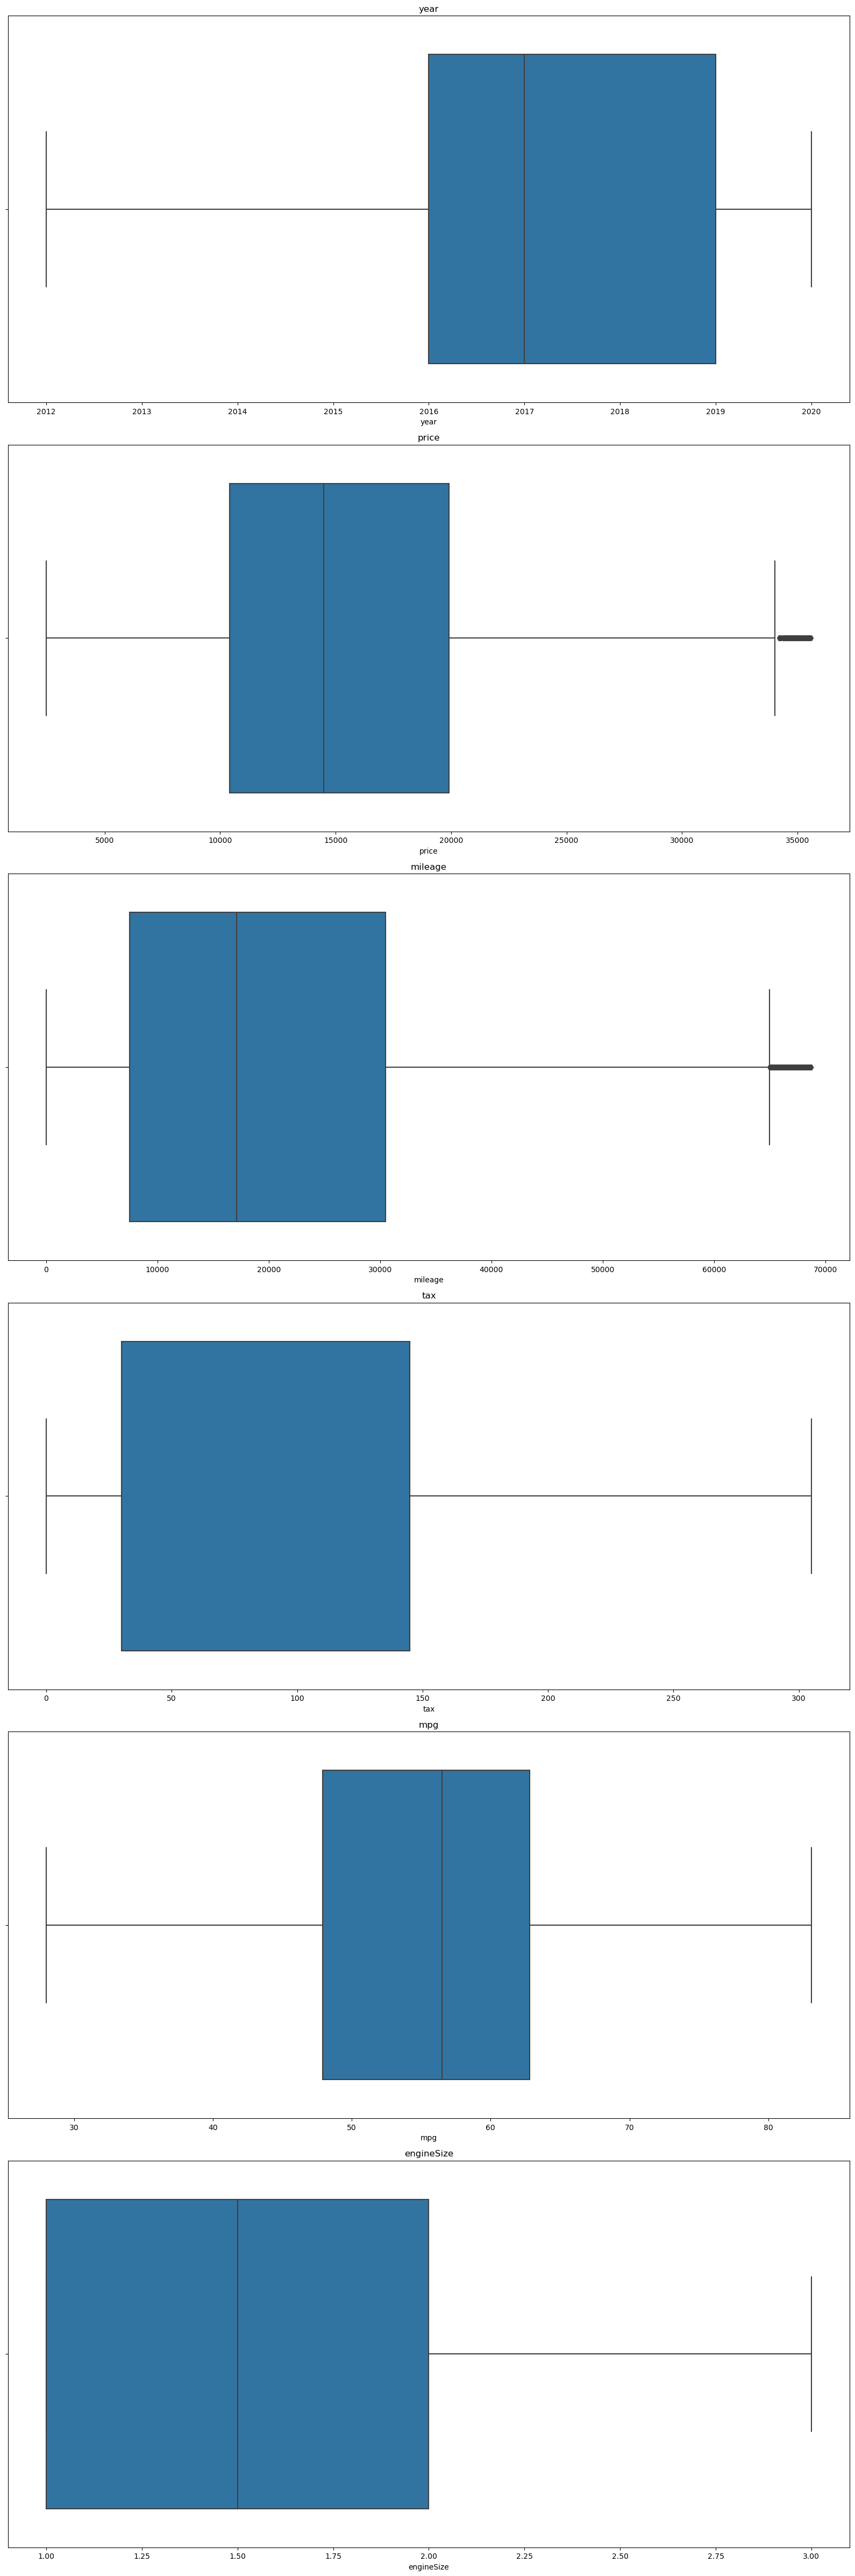

In [16]:
numerical_data = data_cleaned.select_dtypes(include=['int64', 'float64']).copy()
numerical_columns = numerical_data.columns.tolist()

# Setting up the figure based on the number of columns
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(16, 8 * len(numerical_columns)))
axes = axes.flatten() if len(numerical_columns) > 1 else [axes]  # Ensure axes is always a list

# Create boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    sb.boxplot(x=numerical_data[column], orient="h", ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

**Despite removing outliers from our dataset, through the boxplot we can see that price and mileage still have some outliers. However, considering that we are working with a neural network with an autoencoder, it is less sensitive to outliers compared to other models. Moreover, the main attributes in a car are its price and mileage which may often not represent outliers but rather valid extreme scenarios in the real world. For eg. it might be representing luxury cars and hence removing it will make it less applicable in the real world.**

# Converting the Cleaned Data Set into a CSV File

In [17]:
data.to_csv('clean_data.csv')

## Hence, we have now cleaned our dataset. 
1.⁠ ⁠First we checked for the presence of missing values and duplicate rows. Our analysis showed that the dataset did not contain any missing values but it did contain 842 duplicate rows which we then removed. <br>
2.⁠ ⁠Next, we normalise the numerical data and one-hot encode the categorial data to make it easy to process data during the machine learning phase <br>
3.⁠ ⁠Last, we check for the presence of outliers. The function we used to check it showed that our datasets had a considerable amount of outliers. We use remove_outliers() function to remove the outliers but despite that outliers in mileage and price remain. We decide to go against removing these outliers as it might make the model less applicable in real life. High prices might indicate luxury prices.